In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from core.adc import ADC
from core.detector import Detector
from core.filter import WindowFilter as Filter
from core.experiment import run_experiment
from core.radiation import RadiationDensity, show_radiation_density, show_irradiance

from report import run_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
temperature_range = (400, 2800)  # in celsius
filter = Filter(
    span=(900, 2500),
    edge=100,
)
detector = Detector.G12183
adc = ADC(
    resolution=18,
    log=False,
)

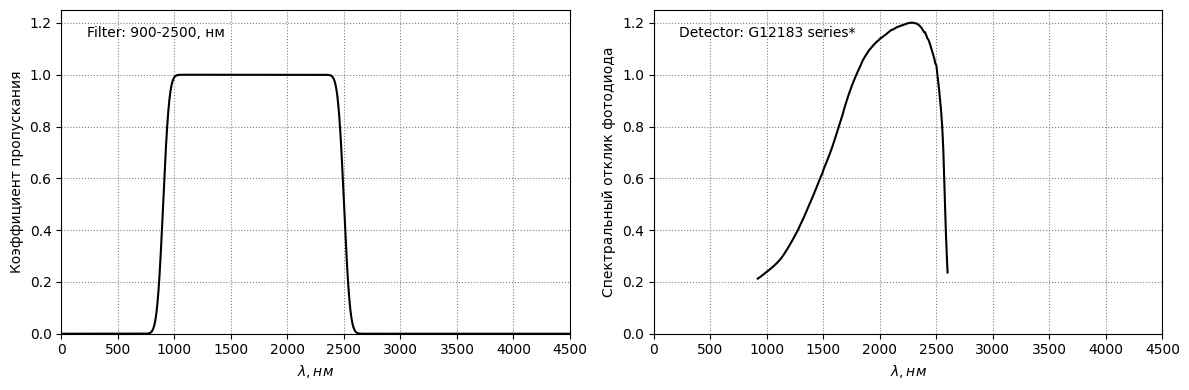

In [3]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), tight_layout=True)

for i, item in enumerate([filter, detector]):
    item.show(info='text', ax=ax[i])

filepath = os.path.join('.', 'report', 'img', 'spectral-response.png')
plt.savefig(filepath)

plt.show()

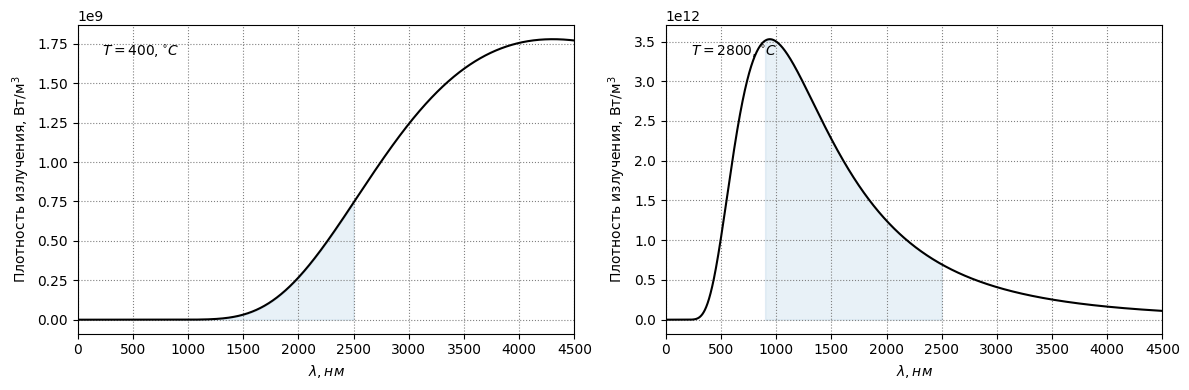

In [4]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), tight_layout=True)

for i, t in enumerate(temperature_range):
    RadiationDensity.show(t, span=filter.span, ax=ax[i])

plt.show()

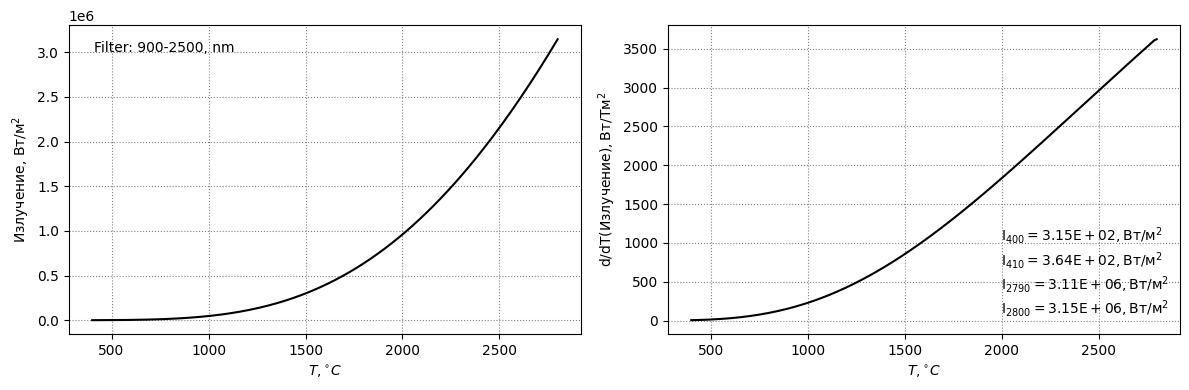

In [5]:
show_irradiance(
    temperature_range=temperature_range,
    filter=filter,
    save=True,
)

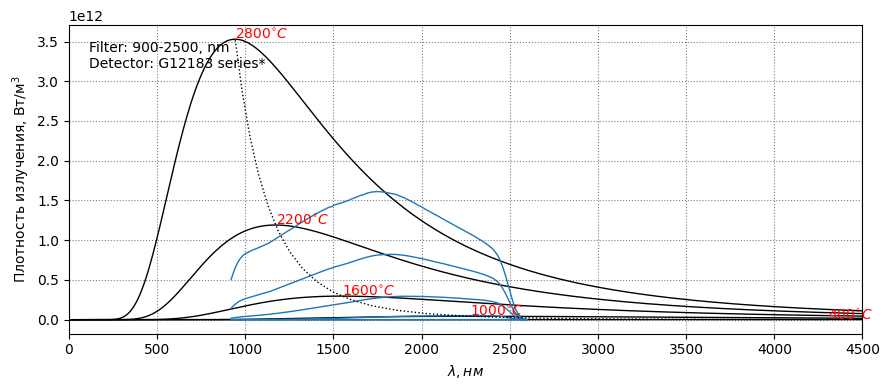

In [6]:
lb, ub = temperature_range

show_radiation_density(
    # temperature=[lb, 650, 900, 1100, 1250],
    temperature=np.linspace(lb, ub, 5),
    filter=filter,
    detector=detector,
    save=True,
)

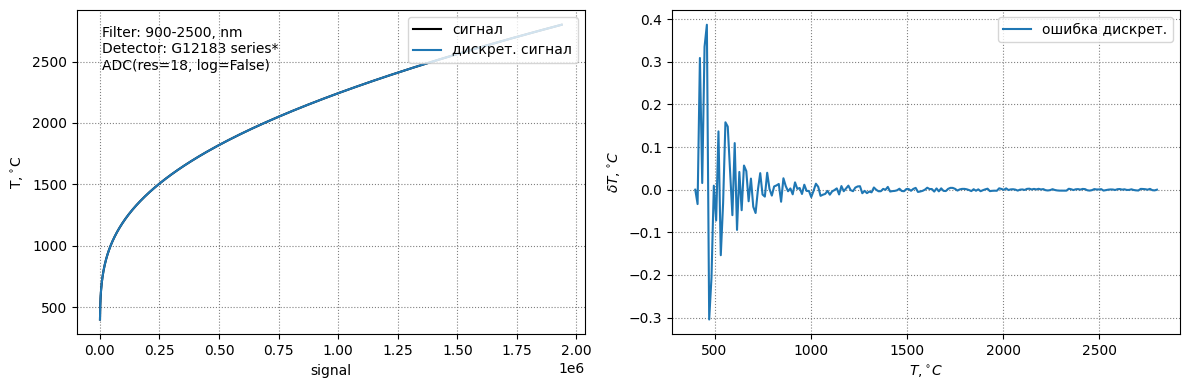

result: True


In [7]:
result = run_experiment(
    temperature_range=temperature_range,
    filter=filter,
    detector=detector,
    adc=adc,
    # relative=True,
    save=True,
)

print(f'result: {repr(result)}')

In [8]:
run_report(
    temperature_range=temperature_range,
    filter=filter,
    detector=detector,
)